# 🛫 I'm Shipping Up To Boston 🏡 - An Airbnb Analysis 📊

A analysis using a dataset about scraped Airbnb data scraped in automn 2016. 

<img src = "https://github.com/RobinWesselmann/Udacity_DataScientist_Class/blob/master/01_Project_DataScienceBlogPost/img/title_photo.PNG">

# Introduction

Airbnb (originally Air Bed and breakfast) founded in 2008 by Brian Chesky is a vacation rental company operating worldwide as an online platform for short-and-long-term homestays in multiple countries.<br>

In the early years, the idea of Airbnb was to provide affordable possibilities to stay in a foreign city while connecting with the respective "host" (<a href="https://andrew-airbnb.medium.com/the-changing-face-of-airbnb-why-everyones-talking-about-it-3d5d31ba2a08">Link</a>). The focus was on building this connection and diving into the city and culture with the eyes and explications of a local. <br>
The concept convinced many people and Airbnb went for a rapid growth over the years and also the business model drifted more into a more profit oriented paradigm: <br>
More and more appartments became investment object and an increasing number of housings became purely Airbnb listings for short term stays for guests and a profitable investment for the hosts. The original 
"stay with the host" concept was not in the center anymore. 
Lately in 2023 even the citizen demonstrated against the flood of Airbnb appartments: Airbnbs are reducing the appartments to stay for the local citizens while increasing the prices for living making it priceless to live in the respective cities (<a href = "https://www.euronews.com/travel/2024/07/22/the-end-of-airbnb-in-barcelona-what-does-the-tourism-industry-have-to-say">Link</a>)





<img src="./img/growth_of_airbnb.PNG">

After this short introduction to the general situation of Airbnb and its popularity, I want to illustrate why I created this notebook for Airbnb analysis.

On my journeys I have made so far, I stayed over for some nights in Airbnbs and had a great time. <br>
But concerning the choice of the Airbnbs I stayed in, the search was quite tedious. On the one hand, I want to stay in a comfortable Airbnb with all amenities, but on the other hand (because normally I stay longer than 2 weeks) the Airbnb should be affordable.

The goal of this analysis is to dive with this background into a scraped Airbnb listing dataset of the city of Boston (we I'll soon have a short stay) and illustrate a fast way to get a solid understanding of your next Airbnb destination by answering the <br>
following questions:

1) What are the districts which are the most affordable ones in Boston for a stay?
2) Which equipments or amenities are most popular for guests? 
3) Which factors have an influence on the price in which intensity?

# 1. Import libraries and load the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import haversine as hs
import folium
import branca.colormap as cm
from branca.element import Figure

import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_rows', 100)

from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

import pgeocode


In [3]:
df_listings = pd.read_csv("data/boston_airbnb/listings.csv")

The dataset is officially described as: 
* Listings: full descriptions and average review score of the Airbnb appartment
* the unique fields / features are described in this file https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596

# 2. First Look in the data

### Check the first rows of the data

At first place, we have to know how the data look like.<br>
Looking the first rows to get an impression should help us to get a first feeling:

In [4]:
df_listings.head(3).T

0  \
id                                                                         12147973   
listing_url                                   https://www.airbnb.com/rooms/12147973   
scrape_id                                                            20160906204935   
last_scraped                                                             2016-09-07   
name                                                     Sunny Bungalow in the City   
summary                           Cozy, sunny, family home.  Master bedroom high...   
space                             The house has an open and cozy feel at the sam...   
description                       Cozy, sunny, family home.  Master bedroom high...   
experiences_offered                                                            none   
neighborhood_overview             Roslindale is quiet, convenient and friendly. ...   
notes                                                                           NaN   
transit                           The bus stop is 2 blocks away, and frequent. B...   
access                            You will have access to 2 bedrooms, a living r...   
interaction                                                                     NaN   
house_rules                       Clean up and treat the home the way you'd like...   
thumbnail_url                     https://a2.muscache.com/im/pictures/c0842db1-e...   
medium_url                        https://a2.muscache.com/im/pictures/c0842db1-e...   
picture_url                       https://a2.muscache.com/im/pictures/c0842db1-e...   
xl_picture_url                    https://a2.muscache.com/im/pictures/c0842db1-e...   
host_id                                                                    31303940   
host_url                                 https://www.airbnb.com/users/show/31303940   
host_name                                                                  Virginia   
host_since                                                               2015-04-15   
host_location                                  Boston, Massachusetts, United States   
host_about                        We are country and city connecting in our deck...   
host_response_time                                                              NaN   
host_response_rate                                                              NaN   
host_acceptance_rate                                                            NaN   
host_is_superhost                                                                 f   
host_thumbnail_url                https://a2.muscache.com/im/pictures/5936fef0-b...   
host_picture_url                  https://a2.muscache.com/im/pictures/5936fef0-b...   
host_neighbourhood                                                       Roslindale   
host_listings_count                                                               1   
host_total_listings_count                                                         1   
host_verifications                        ['email', 'phone', 'facebook', 'reviews']   
host_has_profile_pic                                                              t   
host_identity_verified                                                            f   
street                                Birch Street, Boston, MA 02131, United States   
neighbourhood                                                            Roslindale   
neighbourhood_cleansed                                                   Roslindale   
neighbourhood_group_cleansed                                                    NaN   
city                                                                         Boston   
state                                                                            MA   
zipcode                                                                       02131   
market                                                                       Boston   
smart_location                                                           Boston,

### Statistical description of the dataset

In [5]:
df_listings.describe().T

count          mean           std  \
id                              3585.0  8.440875e+06  4.500787e+06   
scrape_id                       3585.0  2.016091e+13  0.000000e+00   
host_id                         3585.0  2.492311e+07  2.292781e+07   
host_listings_count             3585.0  5.890237e+01  1.711197e+02   
host_total_listings_count       3585.0  5.890237e+01  1.711197e+02   
neighbourhood_group_cleansed       0.0           NaN           NaN   
latitude                        3585.0  4.234003e+01  2.440255e-02   
longitude                       3585.0 -7.108482e+01  3.156464e-02   
accommodates                    3585.0  3.041283e+00  1.778929e+00   
bathrooms                       3571.0  1.221647e+00  5.014871e-01   
bedrooms                        3575.0  1.255944e+00  7.530596e-01   
beds                            3576.0  1.609060e+00  1.011745e+00   
square_feet                       56.0  8.584643e+02  6.088743e+02   
guests_included                 3585.0  1.429847e+00  1.056787e+00   
minimum_nights                  3585.0  3.171269e+00  8.874133e+00   
maximum_nights                  3585.0  2.872584e+04  1.670136e+06   
has_availability                   0.0           NaN           NaN   
availability_30                 3585.0  8.649930e+00  1.043533e+01   
availability_60                 3585.0  2.183319e+01  2.186097e+01   
availability_90                 3585.0  3.855816e+01  3.315827e+01   
availability_365                3585.0  1.793464e+02  1.421362e+02   
number_of_reviews               3585.0  1.904463e+01  3.557166e+01   
review_scores_rating            2772.0  9.191667e+01  9.531686e+00   
review_scores_accuracy          2762.0  9.431571e+00  9.318632e-01   
review_scores_cleanliness       2767.0  9.258041e+00  1.168977e+00   
review_scores_checkin           2765.0  9.646293e+00  7.627532e-01   
review_scores_communication     2767.0  9.646549e+00  7.355070e-01   
review_scores_location          2763.0  9.414043e+00  9.034360e-01   
review_scores_value             2764.0  9.168234e+00  1.011116e+00   
license                            0.0           NaN           NaN   
jurisdiction_names                 0.0           NaN           NaN   
calculated_host_listings_count  3585.0  1.273389e+01  2.941508e+01   
reviews_per_month               2829.0  1.970908e+00  2.120561e+00   

                                         min           25%           50%  \
id                              3.353000e+03  4.679319e+06  8.577620e+06   
scrape_id                       2.016091e+13  2.016091e+13  2.016091e+13   
host_id                         4.240000e+03  6.103425e+06  1.928100e+07   
host_listings_count             0.000000e+00  1.000000e+00  2.000000e+00   
host_total_listings_count       0.000000e+00  1.000000e+00  2.000000e+00   
neighbourhood_group_cleansed             NaN           NaN           NaN   
latitude                        4.223594e+01  4.232999e+01  4.234520e+01   
longitude                      -7.117179e+01 -7.110508e+01 -7.107843e+01   
accommodates                    1.000000e+00  2.000000e+00  2.000000e+00   
bathrooms                       0.000000e+00  1.000000e+00  1.000000e+00   
bedrooms                        0.000000e+00  1.000000e+00  1.000000e+00   
beds                            0.000000e+00  1.000000e+00  1.000000e+00   
square_feet                     0.000000e+00  4.150000e+02  8.250000e+02   
guests_included                 0.000000e+00  1.000000e+00  1.000000e+00   
minimum_nights                  1.000000e+00  1.000000e+00  2.000000e+00   
maximum_nights                  1.000000e+00  3.650000e+02  1.125000e+03   
has_availability                         NaN           NaN           NaN   
availability_30                 0.000000e+00  0.000000e+00  4.000000e+00   
availability_60                 0.000000e+00  0.000000e+00  1.600000e+01   
availability_90                 0.000000e+00  0.000000e+00  3.700000e+01   
availability_365                0.000000e+00  1.900000e+

Having a look at the statistical analysis, we can see that especially the price column has a quite big max value with 4.000 Dollar / night and therefore a big standard deviation.

### Size, unique statistical units, timeframe

In [6]:
#size
print(f"The shape of df_listings for Boston: {df_listings.shape}")

The shape of df_listings for Boston: (3585, 95)


In [7]:
unique_flats_boston = df_listings["id"].unique()
print(f"Count of appartments in Boston: {len(unique_flats_boston)}")

Count of appartments in Boston: 3585


In [10]:
df_listings["last_scraped"].min(), df_listings["last_scraped"].max()

('2016-09-07', '2016-09-07')

### Null values

For the further interpretation and preprocessing, it is useful to know how many records are 
missing. Attributes which <br> show a high proportion of missing data can potentially dropped

In [1248]:
null_vals_listings = pd.DataFrame(df_listings.isnull().sum().sort_values(ascending = False)).rename({0: "null_values_abs"}, axis = 1)
null_vals_listings["%"] = np.round(null_vals_listings["null_values_abs"] / df_listings.shape[0],2)

In [1249]:
null_vals_listings

null_values_abs     %
jurisdiction_names                           3585  1.00
license                                      3585  1.00
neighbourhood_group_cleansed                 3585  1.00
has_availability                             3585  1.00
square_feet                                  3529  0.98
monthly_price                                2697  0.75
weekly_price                                 2693  0.75
security_deposit                             2243  0.63
notes                                        1975  0.55
interaction                                  1554  0.43
access                                       1489  0.42
neighborhood_overview                        1415  0.39
host_about                                   1309  0.37
transit                                      1290  0.36
house_rules                                  1192  0.33
cleaning_fee                                 1107  0.31
space                                        1057  0.29
review_scores_accuracy                        823  0.23
review_scores_location                        822  0.23
review_scores_value                           821  0.23
review_scores_checkin                         820  0.23
review_scores_communication                   818  0.23
review_scores_cleanliness                     818  0.23
review_scores_rating                          813  0.23
last_review                                   756  0.21
reviews_per_month                             756  0.21
first_review                                  756  0.21
thumbnail_url                                 599  0.17
medium_url                                    599  0.17
xl_picture_url                                599  0.17
neighbourhood                                 543  0.15
host_response_time                            471  0.13
host_acceptance_rate                          471  0.13
host_response_rate                            471  0.13
host_neighbourhood                            339  0.09
summary                                       143  0.04
zipcode                                        38  0.01
bathrooms                                      14  0.00
market                                         14  0.00
host_location                                  11  0.00
bedrooms                                       10  0.00
beds                                            9  0.00
property_type                                   3  0.00
city                                            2  0.00
description                                     0  0.00
experiences_offered                             0  0.00
name                                            0  0.00
host_picture_url                                0  0.00
host_thumbnail_url                              0  0.00
host_is_superhost                               0  0.00
picture_url                                     0  0.00
host_id                                         0  0.00
host_url                                        0  0.00
host_name                                       0  0.00
host_since                                      0  0.00
id                                              0  0.00
last_scraped                                    0  0.00
listing_url                                     0  0.00
scrape_id                                       0  0.00
country_code                                    0  0.00
street                                          0  0.00
host_total_listings_count                       0  0.00
host_listings_count                             0  0.00
price                                           0  0.00
amenities                                       0  0.00
bed_type                                        0  0.00
latitude                                        0  0.00
is_location_exact                               0  0.00
longitude                                       0  0.00
room_type                                       0  0.00
accommodates                                    0  0.00
co

There are several attributes in df_listings which show high values of null values.<br>
For example, the columns "has_availability", "licence", "jurisdiction_names", "neighbourhood_group_cleansed" or "square_feet" are missing to a high degree (98 % - 100 %) and contain no information for further analysis.<br>
The other columns with higher proportions of missing values should be investigated within the further analysis


### Check one appartment

For deeper understandment of the data, it is helpful to look into one record to grasph the idea of the columns.

In [1250]:
df_one_airbnb = df_listings[df_listings["id"] == 12147973]

for col in df_one_airbnb.columns:
    print(f"{col}: {df_one_airbnb[col].values[0]}")

id: 12147973
listing_url: https://www.airbnb.com/rooms/12147973
scrape_id: 20160906204935
last_scraped: 2016-09-07
name: Sunny Bungalow in the City
summary: Cozy, sunny, family home.  Master bedroom high ceilings. Deck, garden with hens, beehives & play structure.   Short walk to charming village with  attractive stores, groceries & local restaurants. Friendly neighborhood. Access public transportation.
space: The house has an open and cozy feel at the same time.  The living room has a flat screen TV.  The kitchen has all you need for cooking.  We prefer you buy your food but can use the organic oils, herbs, etc.   The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way.  We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure.
description: Cozy, sunny, family home.  Master bedroom high ceilings. Deck, garden with hens, beehives &

### Check the datatypes

In addition to that, it is necessary to know the data types of the attributes to adapt (if necessary) the data types for further analysis

In [1251]:
df_listings.dtypes.value_counts()

object     62
float64    18
int64      15
Name: count, dtype: int64

In [1252]:
df_listings.columns[df_listings.dtypes == "object"]

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'calendar_last_scraped', 'first_rev

In [1253]:
df_listings[df_listings.columns[df_listings.dtypes == "object"]].head(1).T

0
listing_url                                   https://www.airbnb.com/rooms/12147973
last_scraped                                                             2016-09-07
name                                                     Sunny Bungalow in the City
summary                           Cozy, sunny, family home.  Master bedroom high...
space                             The house has an open and cozy feel at the sam...
description                       Cozy, sunny, family home.  Master bedroom high...
experiences_offered                                                            none
neighborhood_overview             Roslindale is quiet, convenient and friendly. ...
notes                                                                           NaN
transit                           The bus stop is 2 blocks away, and frequent. B...
access                            You will have access to 2 bedrooms, a living r...
interaction                                                                     NaN
house_rules                       Clean up and treat the home the way you'd like...
thumbnail_url                     https://a2.muscache.com/im/pictures/c0842db1-e...
medium_url                        https://a2.muscache.com/im/pictures/c0842db1-e...
picture_url                       https://a2.muscache.com/im/pictures/c0842db1-e...
xl_picture_url                    https://a2.muscache.com/im/pictures/c0842db1-e...
host_url                                 https://www.airbnb.com/users/show/31303940
host_name                                                                  Virginia
host_since                                                               2015-04-15
host_location                                  Boston, Massachusetts, United States
host_about                        We are country and city connecting in our deck...
host_response_time                                                              NaN
host_response_rate                                                              NaN
host_acceptance_rate                                                            NaN
host_is_superhost                                                                 f
host_thumbnail_url                https://a2.muscache.com/im/pictures/5936fef0-b...
host_picture_url                  https://a2.muscache.com/im/pictures/5936fef0-b...
host_neighbourhood                                                       Roslindale
host_verifications                        ['email', 'phone', 'facebook', 'reviews']
host_has_profile_pic                                                              t
host_identity_verified                                                            f
street                                Birch Street, Boston, MA 02131, United States
neighbourhood                                                            Roslindale
neighbourhood_cleansed                                                   Roslindale
city                                                                         Boston
state                                                                            MA
zipcode                                                                       02131
market                                                                       Boston
smart_location                                                           Boston, MA
country_code                                                                     US
country                                                               United States
is_location_exact                                                                 t
property_type                                                                 House
room_type                                                           Entire home/apt
bed_type                                                                   Real Bed
amenities                         {TV,"Wireless Internet",Kitchen,"Free Parking ...
price                                             

In [1254]:
df_listings.columns[df_listings.dtypes == "float64"]

Index(['neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms',
       'bedrooms', 'beds', 'square_feet', 'has_availability',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'jurisdiction_names',
       'reviews_per_month'],
      dtype='object')

In [1255]:
df_listings.columns[df_listings.dtypes == "int64"]

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'calculated_host_listings_count'],
      dtype='object')

There are some of the attributes classified as "object" which are in reality numerical or date. In the following, the necessary variables will be transformed

### Check nunique values

Looking at the cardinality of the different columns, we observe some attributes with 0 or 1 different values.<br>
These columns don't contain any information and can in the further analysis be dropped.

In [1256]:
nunique_vals = df_listings.nunique().sort_values(ascending = True)
nunique_vals

neighbourhood_group_cleansed           0
jurisdiction_names                     0
license                                0
has_availability                       0
country_code                           1
last_scraped                           1
experiences_offered                    1
scrape_id                              1
calendar_last_scraped                  1
state                                  1
country                                1
requires_license                       1
host_identity_verified                 2
is_location_exact                      2
host_has_profile_pic                   2
host_is_superhost                      2
require_guest_phone_verification       2
require_guest_profile_picture          2
instant_bookable                       2
room_type                              3
host_response_time                     4
market                                 4
cancellation_policy                    4
bed_type                               5
bedrooms        

The attributes with nunique vals = 1 are not informative for a model and can be dropped in the following

# 3. More extensive EDA

## a) Short Data Cleaning

In [1257]:
def clean_prices(df_): 

    df_ = df_.str.replace("[,$]", "", regex=True).copy()
    df_ = df_.astype("float")
    df_.rename("price_in_dollar", inplace = True)

    return df_

for col in ["price", "cleaning_fee", "extra_people", "security_deposit"]:
    df_listings[col] = clean_prices(df_listings[col])

In [1258]:
#Drop null cols 
df_listings = df_listings.drop(null_vals_listings[null_vals_listings["%"] == 1].index, axis = 1)

#Drop no info cols
to_drop = df_listings.nunique().sort_values(ascending = True)
to_drop = to_drop[np.where(to_drop<=1, True, False)].index.tolist()
df_listings = df_listings.drop(to_drop, axis = 1)

#drop url 
url_cols = [col for col in df_listings.columns if "url" in col]
df_listings.drop(url_cols, axis = 1, inplace = True)

## b) Closer look at the price feature

### Distribution of price

The distribution of the price is right-skewed with a mean of ~ 174 Dollar.<br>
For further processing where normalshaped data is necessary, log10 transformation could be applied.

np.float64(173.9258019525802)

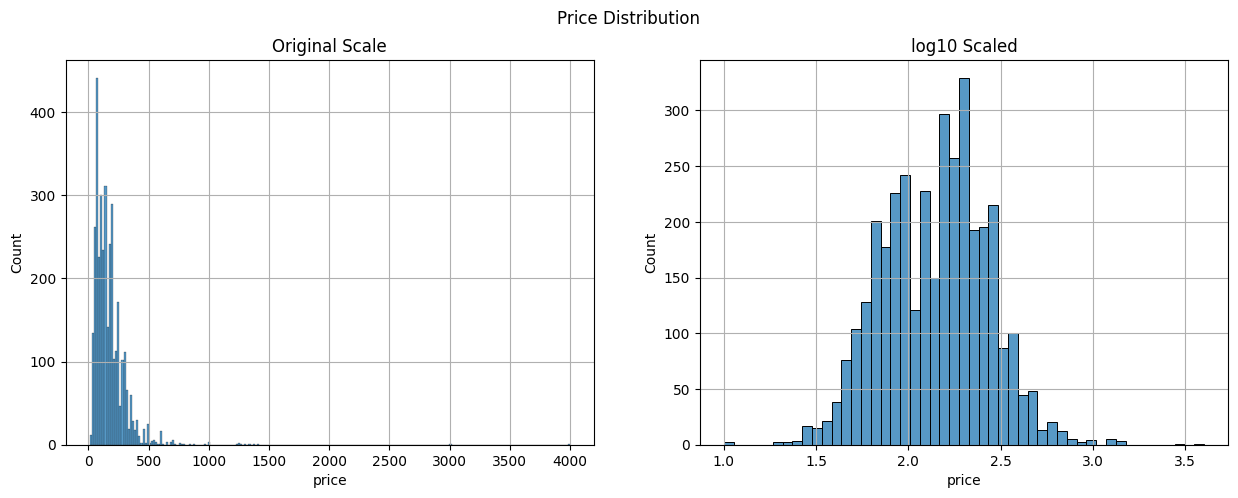

In [1259]:
fig, sub = plt.subplots(1,2, figsize = (15,5))

sns.histplot(x = df_listings["price"], edgecolor = "black", ax = sub[0])
sns.histplot(x = np.log10(df_listings["price"]), ax = sub[1])

for name, s in zip(["Original Scale", "log10 Scaled"],sub.flatten()):
    s.grid()

    s.set_title(f"{name}")

fig.suptitle("Price Distribution");

np.mean(df_listings["price"])

### Numerical features

Looking at the Pearson correlation matrix of the numerical features of the dataset, we can see that the target price is correlated in a linear fashion with <br>
several other features (e.g. accommodates, sqaure feet, bath or bedrooms). This could be useful for the further analysis

In [1260]:
num_feats = df_listings.dtypes[df_listings.dtypes != "object"].index.tolist()
print(f"There are {len(num_feats)} numerical features")

There are 32 numerical features


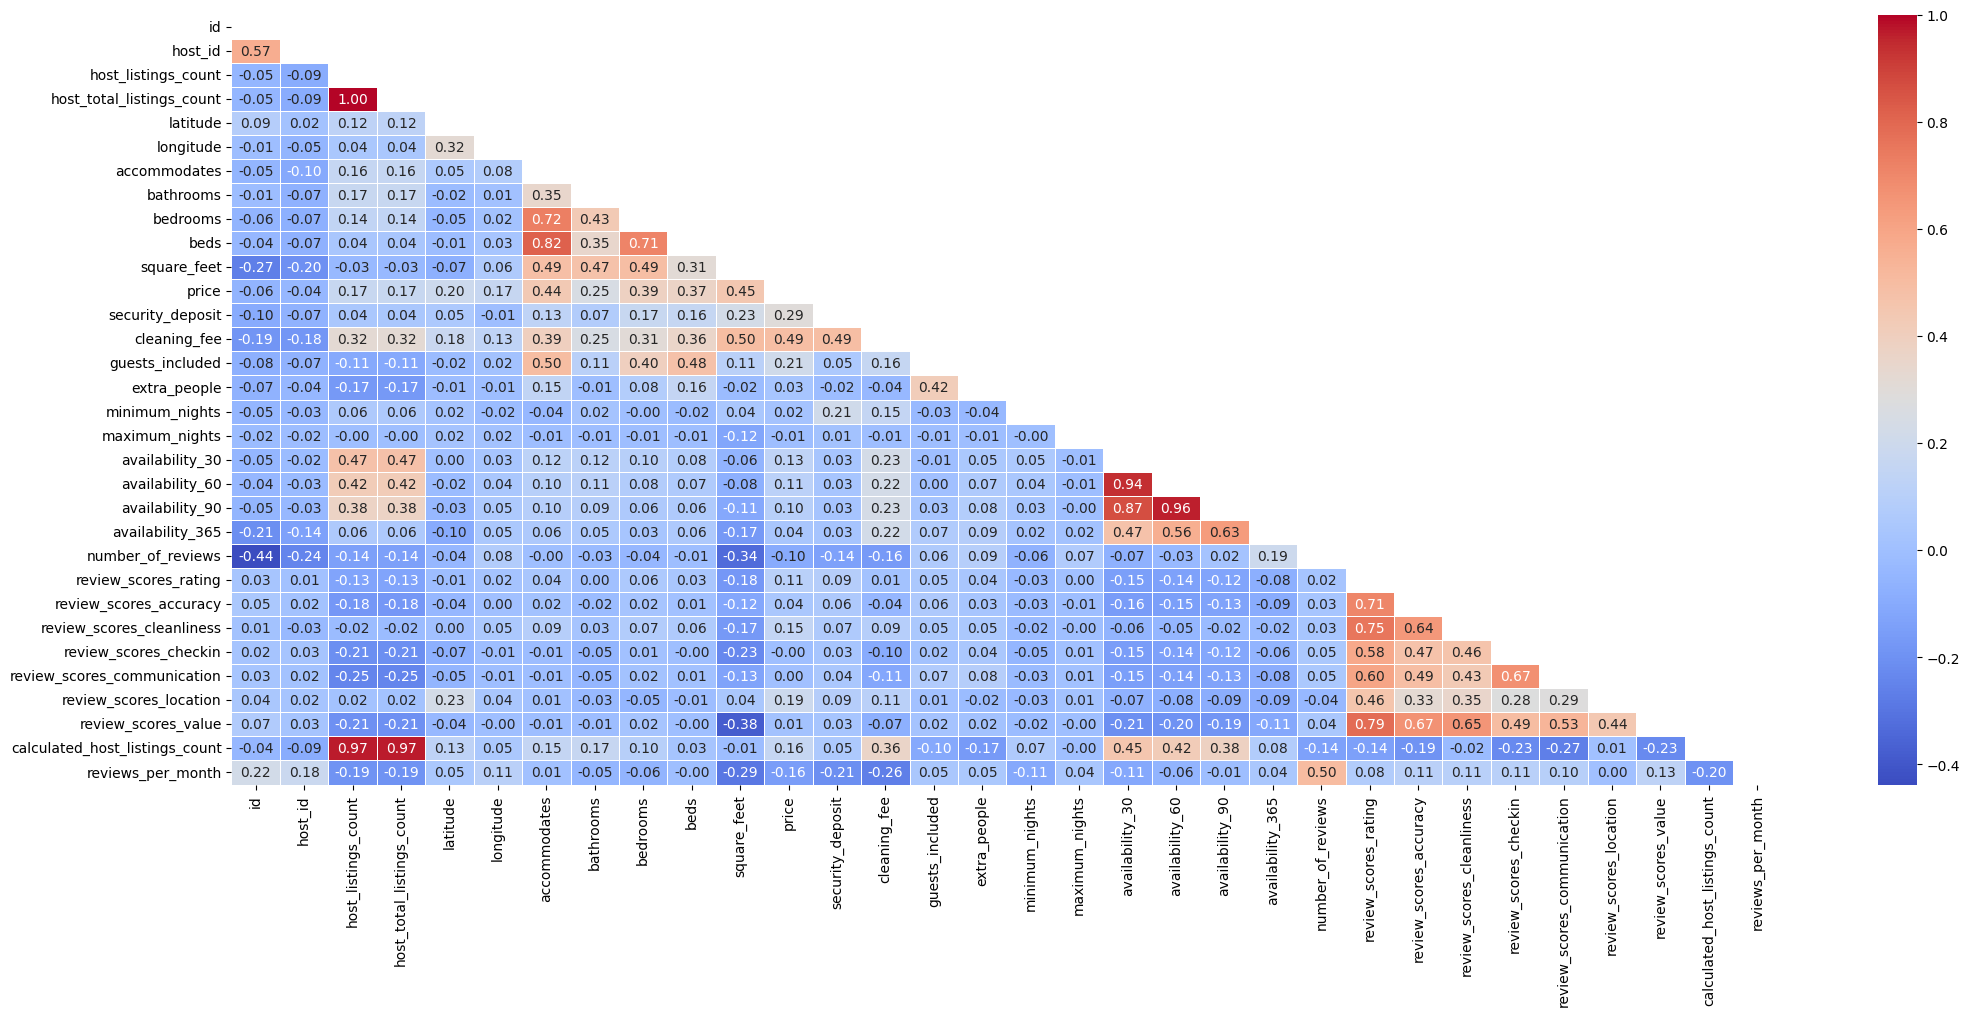

In [1261]:
fig, sub = plt.subplots(1,1, figsize = (25,10))

corr_matrix = df_listings[num_feats].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask = mask, ax = sub, lw = 0.4, cmap = "coolwarm", annot = True, fmt=".2f");

Possible important features could be:
* accommodates
* bathrooms
* bedrooms
* beds
* square feet
* security_deposit
* cleaning_fee
* guests_included
* reviews_per_month

### Categorical featuress

I distinguish the categorical data in low cardinality data (<=10 distinct values) and high cardinality data. <br>
Looking at the low cardinality data, we check the features with a simple groupby-mean() calculation on price to check if the feature could be relevant. 

#### Low Cardinality

In [1262]:
cat_feats = [col for col in df_listings.columns if col not in num_feats]

print(f"There are {len(cat_feats)} categorical features")

There are 43 categorical features


In [1263]:
not_checked_feats = []

for col in cat_feats:

    if df_listings[col].nunique()<=10:
        print(df_listings.groupby([col])["price"].agg(["mean", "count"]).reset_index(),"\n")
        print("#"*50, "\n")
    else:
        not_checked_feats.append(col)

   host_response_time        mean  count
0  a few days or more  150.627907     43
1        within a day  155.127932    469
2  within a few hours  190.050082   1218
3      within an hour  160.638728   1384 

################################################## 

  host_is_superhost        mean  count
0                 f  173.604468   3178
1                 t  176.434889    407 

################################################## 

  host_has_profile_pic        mean  count
0                    f  171.125000      8
1                    t  173.932066   3577 

################################################## 

  host_identity_verified        mean  count
0                      f  173.428717    982
1                      t  174.113331   2603 

################################################## 

                  market        mean  count
0                 Boston  173.910594   3568
1       Other (Domestic)  182.000000      1
2  Other (International)  350.000000      1
3          San Francisco

#### high cardinality

In [1264]:
df_listings[not_checked_feats].head(2)

name  \
0         Sunny Bungalow in the City   
1  Charming room in pet friendly apt   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   

                                         description  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   

                               neighborhood_overview  \
0  Roslindale is quiet, convenient and friendly. ...   
1  The room is in Roslindale, a diverse and prima...   

                                               notes  \
0                                                NaN   
1  If you don't have a US cell phone, you can tex...   

                                             transit  \
0  The bus stop is 2 blocks away, and frequent. B...   
1  Plenty of safe street parking. Bus stops a few...   

                                              access  \
0  You will have access to 2 bedrooms, a living r...   
1  Apt has one more bedroom (which I use) and lar...   

                                         interaction  \
0                                                NaN   
1  If I am at home, I am likely working in my hom...   

                                         house_rules  ...    city zipcode  \
0  Clean up and treat the home the way you'd like...  ...  Boston   02131   
1  Pet friendly but please confirm with me if the...  ...  Boston   02131   

  smart_location property_type  \
0     Boston, MA         House   
1     Boston, MA     Apartment   

                                           amenities weekly_price  \
0  {TV,"Wireless Internet",Kitchen,"Free Parking ...          NaN   
1  {TV,Internet,"Wireless Internet","Air Conditio...      $400.00   

  monthly_price calendar_updated first_review last_review  
0           NaN      2 weeks ago          NaN         NaN  
1           NaN       a week ago   2014-06-01  2016-08-13  

[2 rows x 31 columns]

In [1265]:
df_listings["amenities"]

0       {TV,"Wireless Internet",Kitchen,"Free Parking ...
1       {TV,Internet,"Wireless Internet","Air Conditio...
2       {TV,"Cable TV","Wireless Internet","Air Condit...
3       {TV,Internet,"Wireless Internet","Air Conditio...
4       {Internet,"Wireless Internet","Air Conditionin...
                              ...                        
3580    {Internet,"Wireless Internet","Air Conditionin...
3581    {TV,Internet,"Wireless Internet","Air Conditio...
3582    {"translation missing: en.hosting_amenity_49",...
3583    {Kitchen,Gym,"Family/Kid Friendly",Washer,Drye...
3584    {"Wireless Internet",Kitchen,Essentials,"trans...
Name: amenities, Length: 3585, dtype: object

Possible Features:
* host_response_time
* room_type
* cancellation_policy

The feature "amenities" contains further equipments information of the respective Airbnb. This can be further investigated / processed within the further analysis 

# 4. Analysis

### 1) What are the districts which are the most affordable ones in Boston for a stay?

To answer this question, it is useful to get a first impression concerning the geographical situation in the city.<br>
Therefore, I establish a map showing the location of the different airbnbs colored by their price level (green: really affordable, orange: mid affordable, red: expensive). 

In [1266]:
street_prices = df_listings.groupby(["zipcode","street"])["price"].mean().sort_values(ascending=False).reset_index()
zipcode_prices = df_listings.groupby(["zipcode"])["price"].mean().sort_values(ascending=False).reset_index()

nomi = pgeocode.Nominatim("US")
zipcode_prices["latitude"] = nomi.query_postal_code(zipcode_prices["zipcode"].astype("str").tolist())["latitude"]
zipcode_prices["longitude"] = nomi.query_postal_code(zipcode_prices["zipcode"].astype("str").tolist())["longitude"]
zipcode_prices["placename"] = nomi.query_postal_code(zipcode_prices["zipcode"].astype("str").tolist())["place_name"]

In [1267]:
def draw_map(df, loc_city_center, zipcode_df):

    fig = Figure(width=1200, height=600)

    min_price = df["price"].astype("float").min()
    median_price = df["price"].astype("float").median()
    std_price = df["price"].astype("float").std()
    max_price = df["price"].astype("float").max()

    map = folium.Map(location=[loc_city_center[0], loc_city_center[1]], zoom_start=12, width=1300, height=600)
    fig.add_child(map)

    folium.TileLayer('cartodbpositron').add_to(map)

    colormap = cm.StepColormap(colors=['green','orange', 'red'] ,
                            index=[min_price, 130, 250,4000], 
                            vmin= min_price,
                            vmax=median_price + 1.5 * std_price)

    for id in df["id"].unique():

        lat = df[df["id"] == id]["latitude"]
        lon = df[df["id"] == id]["longitude"]
        price = df[df["id"] == id]["price"].astype("float").values[0]
        name = df[df["id"] == id]["name"].values[0]

        folium.Circle(
            location = [lat, lon],
            radius=6,
            fill=True,
            popup=f"name: {name}\nprice: {price} Dollar",
            color=colormap(price)
            ).add_to(map)

    #map the different zip-code means 
    for row in zipcode_df.dropna().iterrows():

        mean_price = np.mean(row[1]["price"])
        upper_fence = 250
        middle_fence = 130

        if mean_price>upper_fence:

            folium.Marker(
                location = [row[1]["latitude"], row[1]["longitude"]],
                popup = f"Place {row[1]['placename']}: {np.round(row[1]['price'], 1)}",
                icon=folium.Icon(color="red", icon="home")
            ).add_to(map)
        elif (middle_fence<mean_price)&(mean_price<upper_fence): 

            folium.Marker(
                location = [row[1]["latitude"], row[1]["longitude"]],
                popup = f"Place {row[1]['placename']}: {np.round(row[1]['price'], 1)}",
                icon=folium.Icon(color="orange", icon="home")
            ).add_to(map)
        else:

            folium.Marker(
                location = [row[1]["latitude"], row[1]["longitude"]],
                popup = f"Place {row[1]['placename']}: {np.round(row[1]['price'], 1)}",
                icon=folium.Icon(color='green', icon="home")
            ).add_to(map)
    
    #set marker for city center
    folium.Marker(
        location = [loc_city_center[0], loc_city_center[1]],
        popup = "City Center"
    ).add_to(map)


    display(fig)

#############################

city_center_boston_lat = 42.361145
city_center_boston_lon = -71.057083
boston_loc = (city_center_boston_lat, city_center_boston_lon)

In [1268]:
draw_map(df_listings, boston_loc, zipcode_prices)

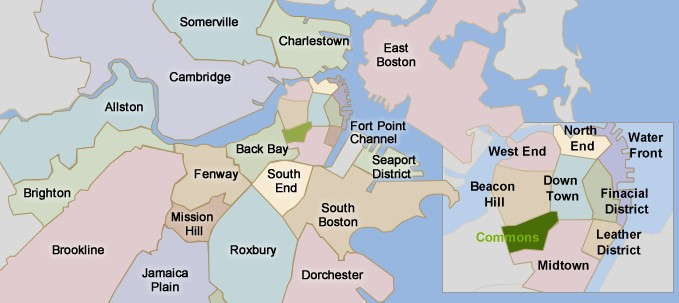

On the map, it can be observed that in the district near to the city center and the coastline (e.g. Financial District, Fort Point Channel, Seaport District, Midtown, West End, etc.), the Airbnbs are with around on average 220 Dollar more expensive.<br>
Districts such as Brighton / Bookline / Allston which are farer away from the city center and the coastline are more affordable (~110 Dollar)
The correlation (correlation-coeff: -0.2962) underlines this suspiscion. 

In [1269]:
df_listings["distance_to_city_center"] = df_listings.apply(lambda x: hs.haversine(boston_loc, (x["latitude"], x["longitude"])), axis = 1)

In [1270]:
df_listings[["price", "distance_to_city_center"]].corr()

price  distance_to_city_center
price                    1.000000                -0.296221
distance_to_city_center -0.296221                 1.000000

Looking at a ranking of all streets concerning the mean price, we can also confirm our suspiscion looking at Google Maps. Streets which are less far of the city center and the ocean side tend to be more expensive. <br>
On the other side, Airbnbs farer away from the city center and the ocean side tend to be lower in price.

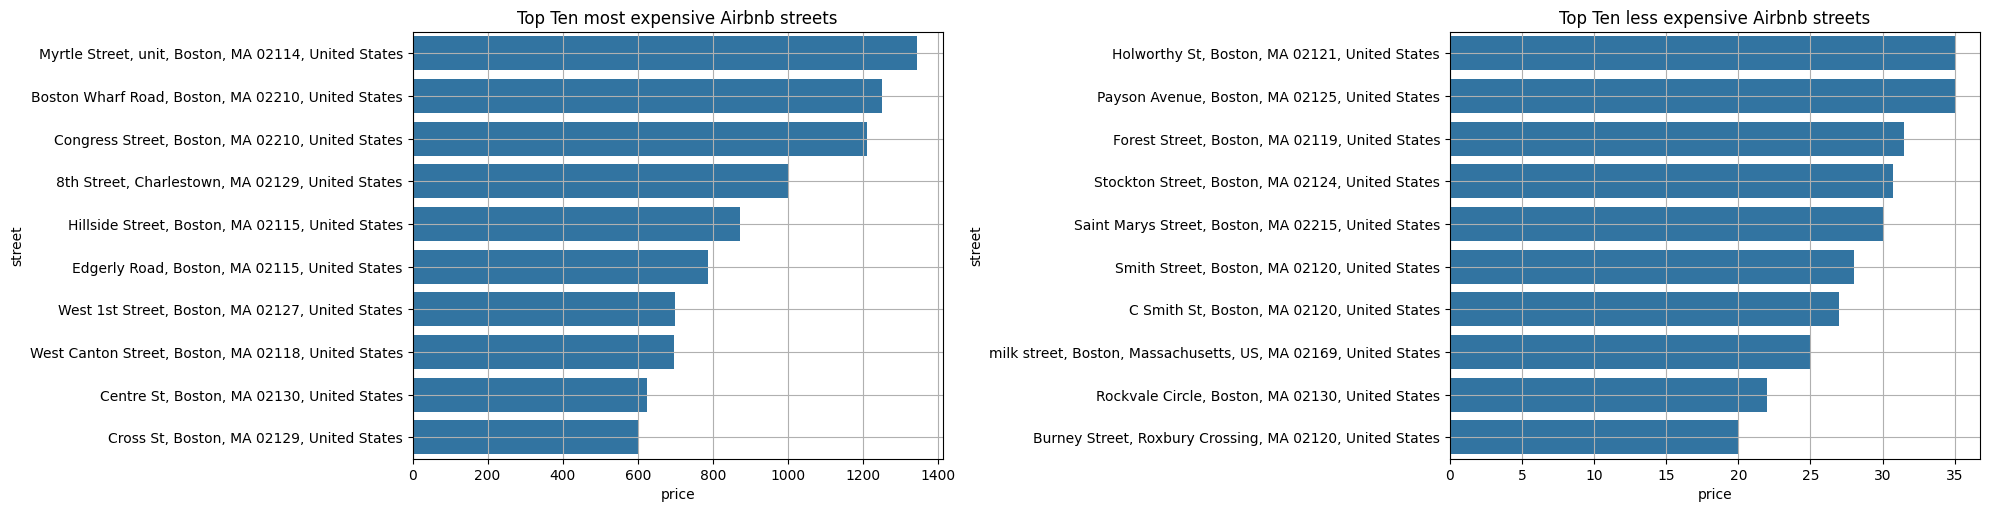

In [1271]:
fig, sub = plt.subplots(1,2, figsize=(20,5))

sns.barplot(y = street_prices["street"].head(10), x = street_prices["price"].head(10), ax = sub[0], orient = "h")
sns.barplot(y = street_prices["street"].tail(10), x = street_prices["price"].tail(10), ax = sub[1], orient = "h")

fig.tight_layout()

for s, name in zip(sub.flatten(), ["Top Ten most expensive Airbnb streets", "Top Ten less expensive Airbnb streets"]):
    s.grid()
    s.set_title(f"{name}")

Conclusion: Beside the finding (or the confirmation of a initial intuition) that in Boston the Airbnbs farer away from the city center and the coastline, there are several district which could be interesting.<br>
* Brighton 
* East Boston
* Roxbury

### 2) Which equipments or amenities are most popular for guests? 

In the closer look on the features within the EDA section (Point 3. More extensive EDA), it was stated that the feature 'amenities' contains some equipments of the respective airbnb such as "AirConditioning", "Cable TV" or "Dryer". 
To answer the question above, we will simply extract the data in the respective column and split it in multiple, independent binary columns:  

In [1272]:
amenities_dict = {}

for id in df_listings["id"]: 

    amenities = df_listings[df_listings["id"] == id]["amenities"].replace(r"[{}\"]", "", regex = True).str.split(",").iloc[0]
    amenities_dict[id] = amenities

list_amenities = sorted(list(set(",".join([",".join(l) for l in list(amenities_dict.values())]).split(","))))[1:]
df_amenities = pd.DataFrame({"Amenities": list_amenities})

for listing_id in list(amenities_dict.keys()):

    df_amenities[listing_id] = [1 if amenit in amenities_dict[listing_id] else 0 for amenit in df_amenities["Amenities"]]

df_amenities = df_amenities.set_index("Amenities").T

In [1273]:
df_amenities

Amenities  24-Hour Check-in  Air Conditioning  Breakfast  \
12147973                  0                 0          0   
3075044                   0                 1          0   
6976                      0                 1          0   
1436513                   0                 1          1   
7651065                   0                 1          1   
...                     ...               ...        ...   
8373729                   1                 1          0   
14844274                  1                 1          0   
14585486                  0                 0          0   
14603878                  0                 0          0   
14504422                  0                 0          0   

Amenities  Buzzer/Wireless Intercom  Cable TV  Carbon Monoxide Detector  \
12147973                          0         0                         0   
3075044                           0         0                         1   
6976                              0         1                         1   
1436513                           0         0                         1   
7651065                           0         0                         1   
...                             ...       ...                       ...   
8373729                           0         0                         1   
14844274                          0         0                         1   
14585486                          0         0                         0   
14603878                          0         0                         0   
14504422                          0         0                         0   

Amenities  Cat(s)  Dog(s)  Doorman  Dryer  ...  Smoke Detector  \
12147973        0       1        0      1  ...               1   
3075044         0       1        0      1  ...               1   
6976            0       0        0      1  ...               1   
1436513         0       0        0      1  ...               1   
7651065         0       0        0      0  ...               1   
...           ...     ...      ...    ...  ...             ...   
8373729         0       0        0      0  ...               1   
14844274        0       0        0      1  ...               1   
14585486        0       0        0      0  ...               0   
14603878        0       0        0      1  ...               0   
14504422        0       0        0      0  ...               0   

Amenities  Smoking Allowed  Suitable for Events  TV  Washer  Washer / Dryer  \
12147973                 0                    0   1       1               0   
3075044                  0                    0   1       1               0   
6976                     0                    0   1       1               0   
1436513                  0                    0   1       1               0   
7651065                  0                    0   0       0               0   
...                    ...                  ...  ..     ...             ...   
8373729                  0                    0   0       0               0   
14844274                 1                    0   1       1               0   
14585486                 0                    0   0       0               0   
14603878                 0                    0   0       1               0   
14504422                 0                    0   0       0               0   

Amenities  Wheelchair Accessible  Wireless Internet  \
12147973                       0                  1   
3075044                        0                  1   
6976                           0                  1   
1436513                        0                  1   
7651065                        0                  1   
...                          ...                ...   
8373729                        0                  1   
14844274                       0                  1   
14585486                       0                  0   
14603878                       0                  0   
14504422                       

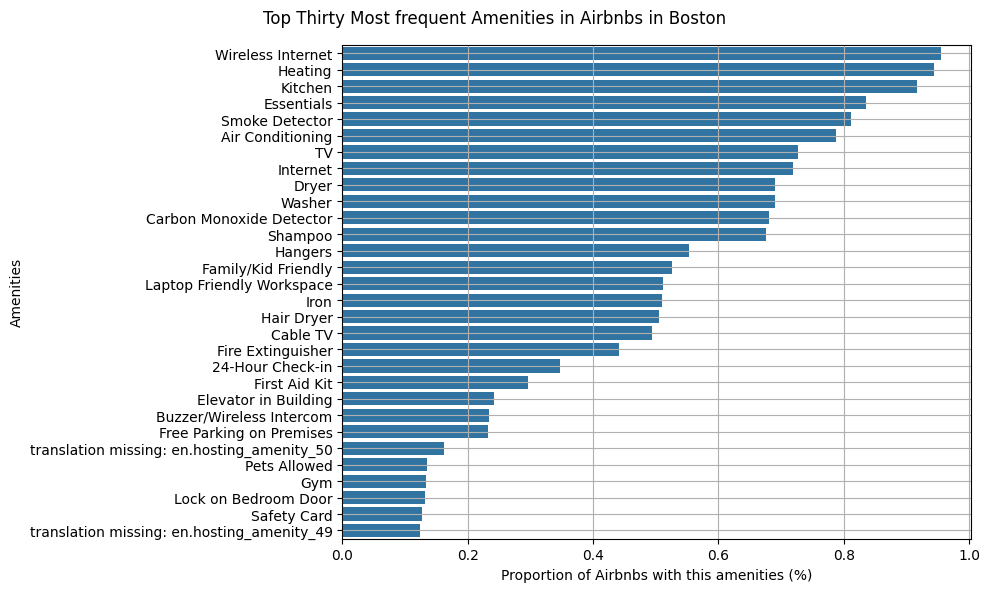

In [1274]:
fig,sub = plt.subplots(1,1,figsize=(10,6))

top_thirty_amenities = df_amenities.mean(axis=0).sort_values(ascending = False).head(30)

sns.barplot(
    y = top_thirty_amenities.index,
    x = top_thirty_amenities,
    ax = sub,
    orient = "h"
)

sub.grid()
sub.set_xlabel("Proportion of Airbnbs with this amenities (%)")
fig.suptitle("Top Thirty Most frequent Amenities in Airbnbs in Boston")

fig.tight_layout()

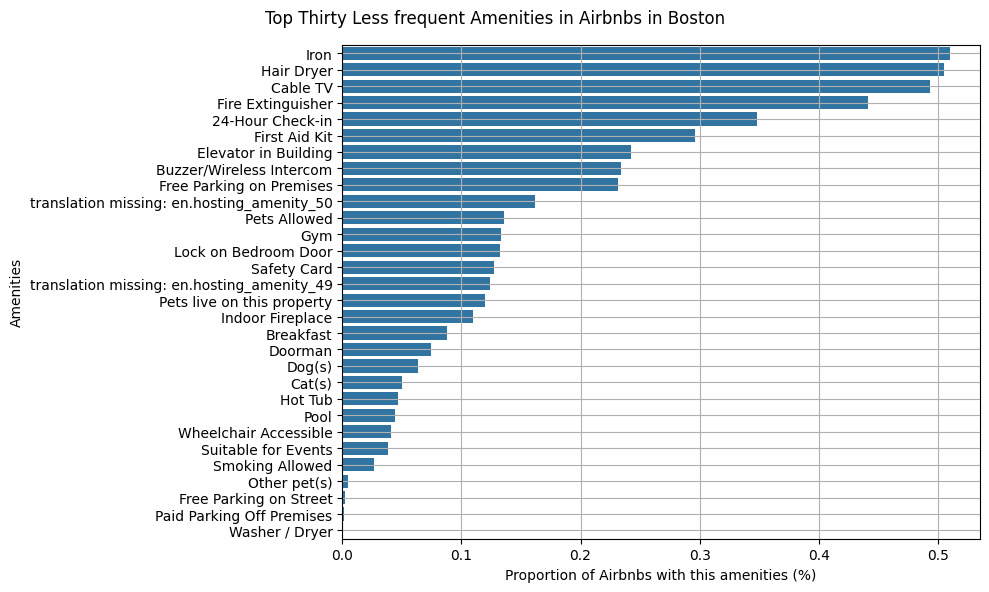

In [1275]:
fig,sub = plt.subplots(1,1,figsize=(10,6))

tail_thirty_amenities = df_amenities.mean(axis=0).sort_values(ascending = False).tail(30)

sns.barplot(
    y = tail_thirty_amenities.index,
    x = tail_thirty_amenities,
    ax = sub,
    orient = "h"
)

sub.grid()
sub.set_xlabel("Proportion of Airbnbs with this amenities (%)")
fig.suptitle("Top Thirty Less frequent Amenities in Airbnbs in Boston")

fig.tight_layout()

We can see: 
* that most of the Airbnbs have "wireless internet" (~94%), a "heating" (~90%) / "kitchen" (~90%) and additional features such as a "TV" (~75%), "Iron" or "washer".
* There are less Airbnbs where "smoking is allowed" and which have a "breakfast" included in the stay or a gym.

But this descriptive analysis above just tell us which amenities are in most of the Airbnbs. We want to know the which amenities are in general more popular for the customers of Airbnb.<br>
The attribute "availability_30" is described as "The availability of the listing 30 days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host."

So, we will look at the Airbnbs which are most popular or in other word the less available in the next 30 days (availability_30) assuming that just a low % of hosts are deliberately blocking their airbnb and check the top 10 amenities of these Airbnbs.



In [1276]:
df_listings_relevant = pd.merge(
    left = df_listings,
    right = df_amenities,
    left_on= "id",
    right_index=True,
    how = "left"
)

df_listings_relevant.drop("id", axis = 1, inplace = True)
df_listings_available_30 = df_listings_relevant[df_listings_relevant["availability_30"]<=30*0.2][df_amenities.columns]

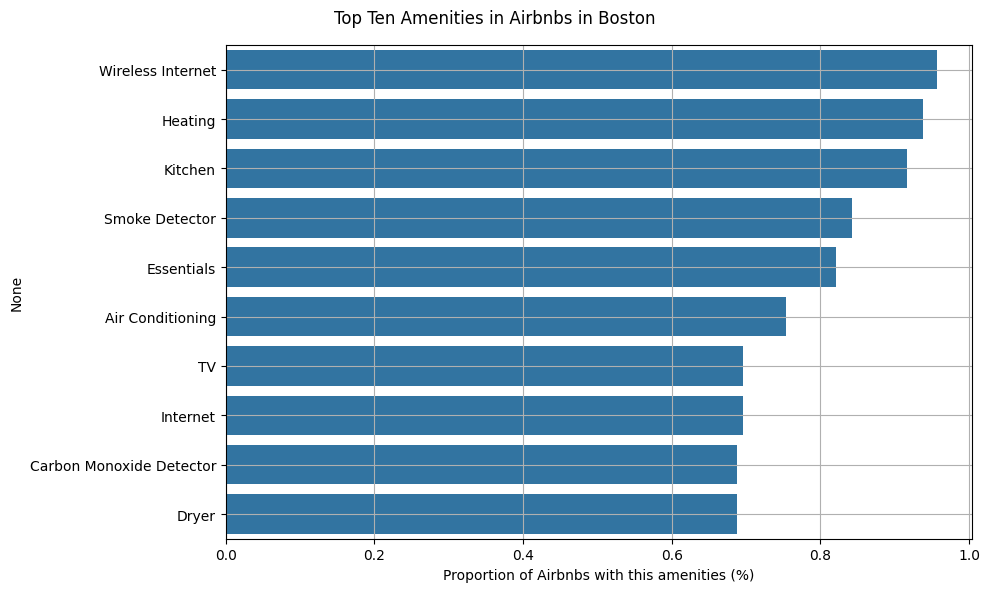

In [1277]:
fig,sub = plt.subplots(1,1,figsize=(10,6))
top_ten_amenities_available_30= df_listings_available_30.mean(axis=0).sort_values(ascending = False).head(10)

sns.barplot(
    y = top_ten_amenities_available_30.index,
    x = top_ten_amenities_available_30,
    ax = sub,
    orient = "h"
)

sub.grid()
sub.set_xlabel("Proportion of Airbnbs with this amenities (%)")
fig.suptitle("Top Ten Amenities in Airbnbs in Boston")

fig.tight_layout()

The most popular Airbnbs, which are mostly booked in the next 30 days, show the top ten amenities above. <br>
Given that these listings seem to be quite popular, we deduct that also these amenities are quite popular for the choice of a Airbnb.  

### 3) Which factors have an influence on the price in which intensity? 

In this question, we want to discover which feature of an Airbnb has, based on the dataset, the most positive or negative influence on the price of the Airbnb.
We are using Ridge Regression for the task due to its good interpretability and simplicity. 

#### First general processing steps

For the next steps we're splitting the categorical and the numerical features

In [1278]:
cat_var = df_listings_relevant.dtypes[df_listings_relevant.dtypes == "object"].index.tolist()
num_var = df_listings_relevant.dtypes[df_listings_relevant.dtypes != "object"].index.tolist()

##### Analysis of categorical features

In [1279]:
for col in cat_var:
    print(f"{col}: {df_listings_relevant[col].iloc[0]}")

name: Sunny Bungalow in the City
summary: Cozy, sunny, family home.  Master bedroom high ceilings. Deck, garden with hens, beehives & play structure.   Short walk to charming village with  attractive stores, groceries & local restaurants. Friendly neighborhood. Access public transportation.
space: The house has an open and cozy feel at the same time.  The living room has a flat screen TV.  The kitchen has all you need for cooking.  We prefer you buy your food but can use the organic oils, herbs, etc.   The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way.  We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure.
description: Cozy, sunny, family home.  Master bedroom high ceilings. Deck, garden with hens, beehives & play structure.   Short walk to charming village with  attractive stores, groceries & local restaurants. Friendly 

To keep things for the moment simple, beside the amenity column, from which we extracted already the equipments of the airbnbs, we consider the attribute 'room_type' and 'property_type'

In [1280]:
relevant_cat_feats = ["property_type", "room_type"]

##### Analysis of numerical features

In [1281]:
for feat in num_var:

    print(f"Feature: {feat}")
    print(f"nunique vals: {df_listings_relevant[feat].nunique()}")
    print(f"Null vals: {df_listings_relevant[feat].isnull().sum()/df_listings_relevant[feat].shape[0]}")

Feature: host_id
nunique vals: 2181
Null vals: 0.0
Feature: host_listings_count
nunique vals: 35
Null vals: 0.0
Feature: host_total_listings_count
nunique vals: 35
Null vals: 0.0
Feature: latitude
nunique vals: 3585
Null vals: 0.0
Feature: longitude
nunique vals: 3585
Null vals: 0.0
Feature: accommodates
nunique vals: 14
Null vals: 0.0
Feature: bathrooms
nunique vals: 12
Null vals: 0.003905160390516039
Feature: bedrooms
nunique vals: 6
Null vals: 0.002789400278940028
Feature: beds
nunique vals: 11
Null vals: 0.002510460251046025
Feature: square_feet
nunique vals: 37
Null vals: 0.9843793584379359
Feature: price
nunique vals: 324
Null vals: 0.0
Feature: security_deposit
nunique vals: 54
Null vals: 0.6256624825662482
Feature: cleaning_fee
nunique vals: 79
Null vals: 0.3087866108786611
Feature: guests_included
nunique vals: 13
Null vals: 0.0
Feature: extra_people
nunique vals: 51
Null vals: 0.0
Feature: minimum_nights
nunique vals: 29
Null vals: 0.0
Feature: maximum_nights
nunique vals: 85

In [1282]:
to_drop = ["host_id", "square_feet", "security_deposit", "cleaning_fee", "host_listings_count", "host_total_listings_count", "calculated_host_listings_count", "longitude", "latitude"]
df_listings_relevant.drop(to_drop, axis = 1, inplace = True)

For the numerical features, we drop features which are either subjectively useless or have too much missing values.

#### Define preprocessing functions

In this section, general preprocessing functions are established for the further analysis

In [1283]:
train_set = df_listings_relevant.copy()

In [1284]:
def reduce_property_cardinality(df_train, df_test = None):
    
    freq_prop_types = df_train["property_type"].value_counts().head(6).index.values

    df_train.loc[~df_train["property_type"].isin(freq_prop_types), "property_type"] = "Other"

    if df_test is not None:
        df_test.loc[~df_test["property_type"].isin(freq_prop_types), "property_type"] = "Other"
        return df_train, df_test
    
    return df_train

In [1285]:
def determine_relevant_num_features(df, no_of_feat):

    num_vars = df.dtypes[df.dtypes != "object"].index.tolist()
    relevant_num_feat = pd.concat([df[num_vars].drop("price", axis = 1), df["price"]], axis = 1).corr()["price"].abs().sort_values(ascending = False).iloc[1:no_of_feat+1].index.tolist()
    return relevant_num_feat

In [1286]:
def impute_data(df_train, df_test = None):

    types = df_train.dtypes

    for feat in df_train.columns:

        if types[feat] == "object":
            df_train[feat] = df_train[feat].fillna(df_train[feat].mode()[0])
            
            if df_test is not None:
                df_test[feat] = df_test[feat].fillna(df_train[feat].mode()[0])

        else:
            df_train[feat] = df_train[feat].fillna(df_train[feat].mean())
            if df_test is not None:
                df_test[feat] = df_test[feat].fillna(df_train[feat].mean())
    
    return df_train, df_test

In [1287]:
def preprocess(X_train, y_train, X_test, y_test, num_of_feats):

    #reduce cardinality
    X_train, X_test = reduce_property_cardinality(X_train, X_test)

    #determine relevant features
    relevant_num_feats = determine_relevant_num_features(pd.concat([X_train, y_train], axis = 1), num_of_feats)
    relevant_feats = relevant_cat_feats + relevant_num_feats

    X_train, X_test = X_train[relevant_feats], X_test[relevant_feats]

    #impute missing data
    X_train, X_test = impute_data(X_train, X_test)

    #Get Dummies
    cat_train = pd.get_dummies(X_train[relevant_cat_feats], prefix_sep = "_")
    cat_train["origin"] = "train"

    cat_test = pd.get_dummies(X_test[relevant_cat_feats], prefix_sep = "_")
    cat_test["origin"] = "test"

    cat_summary = pd.concat([cat_train, cat_test], axis = 0).fillna(0)

    X_train.drop(relevant_cat_feats, axis = 1, inplace = True)
    cat_summary_filtered_train = cat_summary[cat_summary["origin"] == "train"].drop("origin", axis = 1)

    X_test.drop(relevant_cat_feats, axis = 1, inplace = True)
    cat_summary_filtered_test = cat_summary[cat_summary["origin"] == "test"].drop("origin", axis = 1)

    X_train = pd.concat([X_train, cat_summary_filtered_train], axis = 1)
    X_test = pd.concat([X_test, cat_summary_filtered_test], axis = 1)

    return X_train, X_test

#### Run Ridge Regression

In the following we're doing repeated train-validation split to get a thorough understanding of the model built. 
We're just using for each iteration the categorical features 'property_type' and 'room_type' and the 20 numerical features which are most correlated with the target (price).

Note: This procedure is not the same as Crossvalidation, but also a form to validate the model built.

In [1312]:
runs = {}
coef_df = pd.DataFrame()

for i in range(100):

    #get data
    X = train_set.drop("price", axis = 1)
    y = train_set["price"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle = True)

    #preprocess
    X_train_prep, X_test_prep = preprocess(X_train, y_train, X_test, y_test, num_of_feats = 20)

    #scale predictors
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_prep)
    X_test_scaled = scaler.transform(X_test_prep)

    #training
    alpha = 4

    params = {"alpha": alpha, "random_state":42, "fit_intercept":True}
    model = Ridge(**params)

    model.fit(X_train_scaled, y_train)

    #predict + score
    y_test_pred = model.predict(X_test_scaled)
    score_rmse = root_mean_squared_error(y_test, y_test_pred)
    score_mae = mean_absolute_error(y_test, y_test_pred)
    score_r2 = r2_score(y_test, y_test_pred)

    original_scale_coeff = np.round(model.coef_ / scaler.scale_, 2)

    if len(coef_df)==0:
        coef_df = pd.DataFrame({"Feats": X_train_prep.columns, f"coef_run_{i+1}": original_scale_coeff})
    else:
        coef_tmp = pd.DataFrame({"Feats": X_train_prep.columns, f"coef_run_{i+1}": original_scale_coeff})
        coef_df = pd.merge(left = coef_df, right = coef_tmp, left_on = "Feats", right_on = "Feats", how = "inner")


    #fill run_dict
    runs[f"run_{i+1}"] = {
        "alpha": alpha,
        "rmse": score_rmse,
        "mae": score_mae,
        "r2": score_r2,
        "model": model,
        "scaler": scaler
    }

    #print scores
    print(f"Run {i+1} RMSE: {np.round(score_rmse,2)} ...")
    print(f"Run {i+1} R2: {np.round(score_r2,2)} ...")
    print(f"Run {i+1} MAE: {np.round(score_mae,2)} ...\n")


Run 1 RMSE: 95.53 ...
Run 1 R2: 0.41 ...
Run 1 MAE: 52.12 ...

Run 2 RMSE: 91.09 ...
Run 2 R2: 0.51 ...
Run 2 MAE: 55.17 ...

Run 3 RMSE: 96.95 ...
Run 3 R2: 0.38 ...
Run 3 MAE: 48.78 ...

Run 4 RMSE: 68.6 ...
Run 4 R2: 0.63 ...
Run 4 MAE: 45.23 ...

Run 5 RMSE: 71.4 ...
Run 5 R2: 0.46 ...
Run 5 MAE: 49.07 ...

Run 6 RMSE: 256.73 ...
Run 6 R2: 0.13 ...
Run 6 MAE: 64.89 ...

Run 7 RMSE: 100.39 ...
Run 7 R2: 0.45 ...
Run 7 MAE: 52.63 ...

Run 8 RMSE: 80.36 ...
Run 8 R2: 0.51 ...
Run 8 MAE: 54.82 ...

Run 9 RMSE: 174.35 ...
Run 9 R2: 0.23 ...
Run 9 MAE: 62.4 ...

Run 10 RMSE: 73.47 ...
Run 10 R2: 0.54 ...
Run 10 MAE: 45.67 ...

Run 11 RMSE: 95.31 ...
Run 11 R2: 0.46 ...
Run 11 MAE: 51.54 ...

Run 12 RMSE: 83.09 ...
Run 12 R2: 0.52 ...
Run 12 MAE: 47.01 ...

Run 13 RMSE: 218.5 ...
Run 13 R2: 0.14 ...
Run 13 MAE: 57.72 ...

Run 14 RMSE: 92.92 ...
Run 14 R2: 0.54 ...
Run 14 MAE: 51.42 ...

Run 15 RMSE: 91.8 ...
Run 15 R2: 0.44 ...
Run 15 MAE: 48.48 ...

Run 16 RMSE: 85.36 ...
Run 16 R2: 0.44

In [1313]:
avg_mae = np.mean([runs[r]["mae"] for r in runs])
avg_rmse = np.mean([runs[r]["rmse"] for r in runs])
avg_r2 = np.mean([runs[r]["r2"] for r in runs])

coef_df_avg = coef_df.set_index("Feats").mean(axis = 1).reset_index().rename({0:"mean_coef"}, axis = 1).sort_values(by = "mean_coef", ascending=False)

print("Model scores: \n")
print(f"Average Mean Absolute Error: {np.round(avg_mae,2)}")
print(f"Average Root Mean Squared Error: {np.round(avg_rmse,2)}")
print(f"Average r2: {np.round(avg_r2,2)}")

Model scores: 

Average Mean Absolute Error: 53.25
Average Root Mean Squared Error: 111.28
Average r2: 0.41


After having validated the model 100 iterations, we get an average MAE of 53 Dollar, an average RMSE of 112 Dollar and an average r2 value of 42 %. <br>
The results are not excellent, but remembering the dataset analysis of the beginning, we have on the price side some quite heavy outlier (e.g. 4000 Dollar / night). So, the bad RMSE as well as the r2 <br>
which penalizing outliers quite hard are reasonable. 

Looking at the influence of the different features on the price, we can analyze the beta-coefficients below:

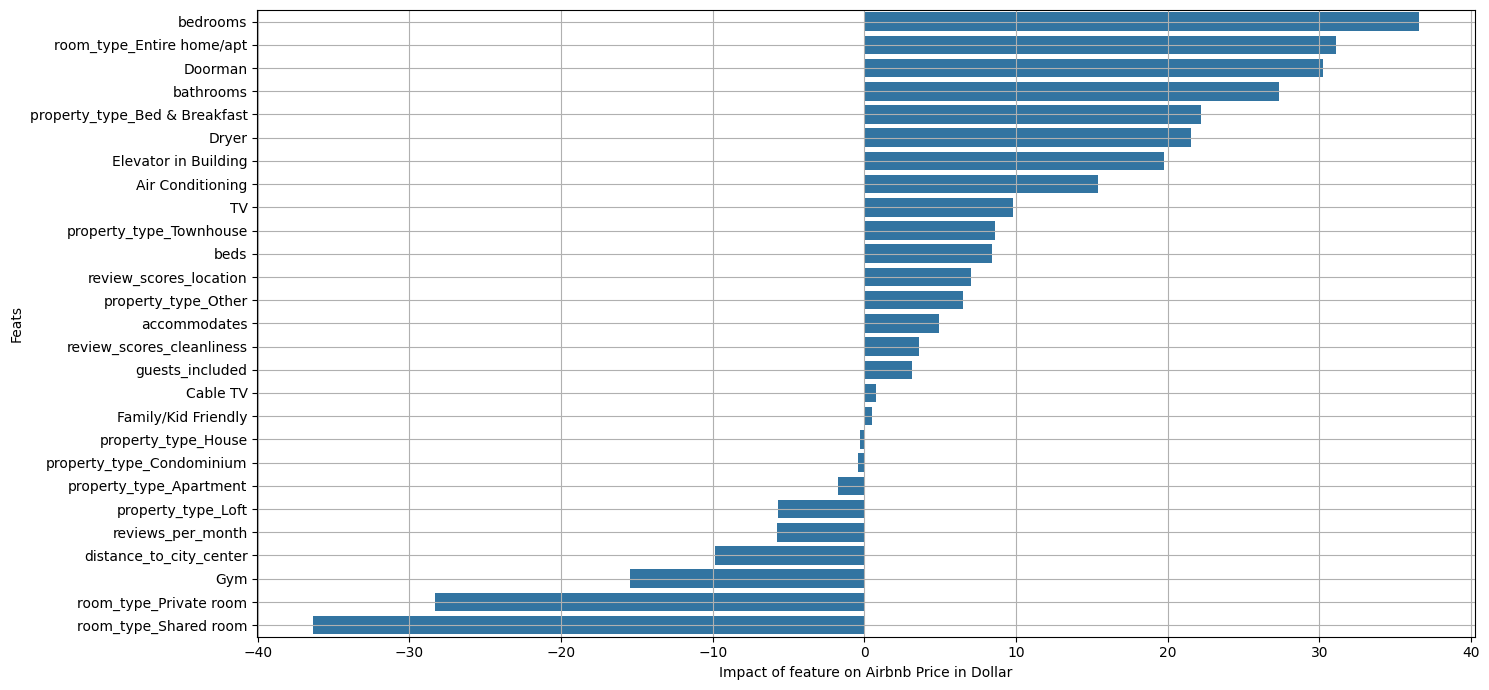

In [1314]:
fig,sub = plt.subplots(1,1, figsize = (15,7))

sns.barplot(y = coef_df_avg["Feats"], x = coef_df_avg["mean_coef"], orient = "h", ax = sub)
sub.grid()
sub.set_xlabel("Impact of feature on Airbnb Price in Dollar")
fig.tight_layout();

In [1302]:
coef_df_avg

Feats  mean_coef
1                        bedrooms    36.9304
22      room_type_Entire home/apt    31.1505
13                        Doorman    29.5174
5                       bathrooms    27.4636
16  property_type_Bed & Breakfast    22.1832
14                          Dryer    21.4812
10           Elevator in Building    19.9604
8                Air Conditioning    15.3488
4                              TV    10.1256
21        property_type_Townhouse     9.1102
2                            beds     8.4327
11         review_scores_location     6.9995
20            property_type_Other     6.2655
0                    accommodates     4.6753
9                 guests_included     3.2077
6             Family/Kid Friendly     0.6909
7                        Cable TV     0.6309
17      property_type_Condominium     0.0991
18            property_type_House    -0.3739
15        property_type_Apartment    -1.8138
19             property_type_Loft    -6.1844
3         distance_to_city_center    -9.8494
12                            Gym   -16.3869
23         room_type_Private room   -28.3795
24          room_type_Shared room   -36.7156

In [1316]:
#top5 and flop5
pd.concat([coef_df_avg.head(), coef_df_avg.tail()], axis=0)

Feats  mean_coef
1                        bedrooms    36.5901
24      room_type_Entire home/apt    31.0909
13                        Doorman    30.2291
5                       bathrooms    27.3632
18  property_type_Bed & Breakfast    22.2218
14              reviews_per_month    -5.7888
3         distance_to_city_center    -9.8309
12                            Gym   -15.4652
25         room_type_Private room   -28.3432
26          room_type_Shared room   -36.3808

Following the model, for an additional bedroom for e.g. a customer would pay an extra of ~ 37 Dollar. <br>
Looking at the top 5 / flop 5 coefficients, we can see:
* positive influence:
    * additional bedrooms
    * customers renting the whole home / appartment
    * there is a doorman employed for the house / appartment
    * additional bathrooms
    * the Airbnb is a bed&breakfast

* negative influence:
    * review_per_month
    * with each km farer away from the city center the price is lower
    * if there is a Gym included the price is lower (not really logic, further investigation needed)
    * if the Airbnb is just a private or a shared room has a negative impact on the price

Conclusion: There are several features which have a positive / negative impact on the final price of the Airbnb. <br>
It is quite handy to know and check which features are worth how much Dollar and also to consider these information in the search for an Airbnb.

# Conclusion

In this analysis, we have to split the results into the concrete findings for the city of Boston and the more general result of establishing an approach of analyzing airbnb data to help other guests to quickly gain insights for their next stay.

<div class="alert alert-block alert-warning">
<b>Concrete Findings in Boston dataset </b> 
</div>

1) For the first question which districts are the most affordable for the stay, we found out that in particular Brighton, East Boston and Roxbury are the most affordable ones. In addition to that, we confirmed the intuition that Airbnbs far away from the city center tend to be more affordable than the ones in the city center. As Boston is a city situated at the coastline, Airbnbs in streets which are near to the coast lines seemingly also higher in price. 
--------------------------------------------------

2) Concerning the second question, we investigated which amenities are most popular ones for guests in the city. We filtered out the 10 most popular amenities which are: 
   1. Wireless Internet 2. Heating 3. Kitchen 4. Smoke Detector 5. Essentials 6. Air Conditioning 7. TV 8. Internet 9. Carbon Monoxide Detector 10. Dryer
--------------------------------------------------

3) Looking at the third question, we wanted to know which factors incluence the price and in which intensity. <br>
The price is impacted positively (higher price) by the number of rooms (bedrooms +36$ per room / bathrooms +27$ per room) and the customers are set to pay an extra to rent the entire home/appartment (+31$). A doormann for the airbnb or if the Airbnb is a bed&breakfast seem also to be factors for which the guests are ready to pay an extra. <br>

   On the other hand, the guests seem to expect a lower price for an Airbnb farer away from the city center and if the Airbnb is listed as a shared (- 36 $ / private room (- 26 $). Two factors a) if a gym is included in the Airbnb b) how many reviews_per_month the Airbnb have also a negative impact on the final price of the listing, which may seem not intuitive. Further investigation could be made on these results. 

<div class="alert alert-block alert-warning">
<b>General result to an approach analyzing Airbnb data </b> 
</div>

Within this analysis we got to know the city of Boston quite well and the general questions raised in this analysis brought some light into Boston's Airbnb market.
* In general, the idea to begin with a geographical overview is correct and the user could gain a quick glimpse on the price distribution geographically. In following analysis' more facettes of the data could be reflected in the geographical view (not only the price). An example which could be interesting and could describe the districts even better would be the house prices (is the district a rich district / a more affordable one?) or the the average age of the residents in the district (Are we in a young dynamic neighbourhood or a more sober one?)

* The second step to give a short overview about the amenities most of the Airbnbs possess and then dive into the analysis is good but not perfect. Maybe there are in further analysis other ideas to check which amenities are loved by the guests

* The third step to split up the influence of the distinct attributes on the price could really be helpful for the understanding of the price building and also for the search of the Airbnb that fits your needs (for the right price). I think it's possible to add further elements / features to the model to reduce the RMSE even further and create a more robust model (even for prediction and not only for analyzing the relationships)

* In future, a further idea which come to my mind would be to analyze timeseries of the prices and availabilities to provide a deeper understanding if there are maybe periods which are more interesting to travel to the respective city than others (price and events/availabilities). In addition further attributes could be added or other data be analyzed such as temperature, weather events, social events etc. and their effects on prices. 

But now... let's start travelling... <br><br>
<img src="./img/lets_travel.PNG">